
# PLANEACION DEL PROYECTO:

* COMPARAR NUESTRAS VARIABLES TANTO NUMERICAS COMO CATEGORICAS VS (PROFYT, SALES), UNA VEZ DETERMINADA LA RELACIÓN VEMOS EL NIVEL DE CORRLEACIÓN Y SI IMPACTA EN NUETRA TARGET SE MANTIENE LA VARIABLE SINO SE DROPEA. 

* PARTE 1

GRAFICOS DE DISTRIBUCION 1 VARIABLE
GRAFICOS DE DOS VARIABLES 1 VS 1
GRAFICOS ELABORADOS CON GROUP BY. 
GRAFICOS BOXPLOT, VIOLIN PLOT. 

* PARTE 2 
LIMPIEZA 
CODIFICACION 
NORMALIZACION 
EXTREMOS 

* PARTE 3 
MODELAMIENTO
REGRESION 
MULTICLASIFICACION 
PERFILAMIENTO

* PARTE 4
 CONCLUISONES


 ## FECHA LIMITE DE TERMINACION SABADO 9 DE DICIEMBRE 


# PREGUNTAS A RESPONDER:

* ¿EXISTEN ALGUNOS CLIENTES QUE SON REGULARES? SI ES ASI, ¿CUALES DE ELLOS GENERAN MAYORES GANANCIAS?
* ¿CUALES SUBCATEGORIAS DE PRODUCTOS SON LOS RESPONSABLES POR LA MAYORIA DE LAS GANANCIAS NEGATIVAS DE LAS VENTAS?
* ¿HAY ALGUNA TENDENCIA CON RESPECTO A COMO SE VENDEN LOS DIFERENTES PRODUCTOS RESPECTO AL TIEMPO?
* ¿HAY ALGUN PATRON CON RESPECTO A COMO LAS DIFERENTES SUB CATEGORIAS DE PRODUCTOS SE VENDEN EN LOS DIFERENTES MERCADOS?


# Librerías

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


pd.set_option('display.max_columns', None)

# Lectura de Datos

In [54]:
#df = pd.read_csv("data.csv",delimiter=";")
df = pd.read_csv("./datasets/superstore.csv")
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,postal_code,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [109]:
for c in df.columns:
    print( c, df[c].map(type).unique().tolist(), "\n"*1)

row_id [<class 'int'>] 

order_id [<class 'str'>] 

order_date [<class 'str'>] 

ship_date [<class 'str'>] 

ship_mode [<class 'str'>] 

customer_id [<class 'str'>] 

customer_name [<class 'str'>] 

segment [<class 'str'>] 

city [<class 'str'>] 

state [<class 'str'>] 

country [<class 'str'>] 

market [<class 'str'>] 

region [<class 'str'>] 

product_id [<class 'str'>] 

category [<class 'str'>] 

sub-category [<class 'str'>] 

product_name [<class 'str'>] 

sales [<class 'float'>] 

quantity [<class 'int'>] 

discount [<class 'float'>] 

profit [<class 'float'>] 

shipping_cost [<class 'float'>] 

order_priority [<class 'str'>] 



# Preprocesamiento

In [55]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub-category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

In [56]:
df.shape

(51290, 24)

In [57]:
df.isna().sum()

row_id                0
order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_id           0
customer_name         0
segment               0
city                  0
state                 0
country               0
postal_code       41296
market                0
region                0
product_id            0
category              0
sub-category          0
product_name          0
sales                 0
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
dtype: int64

In [58]:
# Postal Code tiene el 80% de nulos, por lo tanto eliminas toda la columna.
df.isna().sum()/len(df)

row_id            0.000000
order_id          0.000000
order_date        0.000000
ship_date         0.000000
ship_mode         0.000000
customer_id       0.000000
customer_name     0.000000
segment           0.000000
city              0.000000
state             0.000000
country           0.000000
postal_code       0.805147
market            0.000000
region            0.000000
product_id        0.000000
category          0.000000
sub-category      0.000000
product_name      0.000000
sales             0.000000
quantity          0.000000
discount          0.000000
profit            0.000000
shipping_cost     0.000000
order_priority    0.000000
dtype: float64

In [59]:
df.drop('postal_code', axis=1, inplace=True)

In [60]:
df.isna().sum()

row_id            0
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
city              0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub-category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
dtype: int64

In [61]:
# Revisamos duplicados
df.duplicated().sum()

0

# EDA

In [62]:
# Como primer objetivo obtener una regresión para las variables sales y profit.
target = ['sales', 'profit']

In [63]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority'],
      dtype='object')

In [64]:
df.head(1)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium


In [65]:
varc = ['sales', 'quantity', 'discount', 'profit', 'shipping_cost']

In [75]:
vard = ['order_id', 'ship_mode', 'customer_id', 'customer_name', 'segment', 'country', 'city', 'state', 'region', 'market', 'category', 'sub-category', 'product_name', 'order_priority']

In [67]:
df[varc].describe(percentiles = [0.01, 0.05, .25, .75, .95, .99])

,sales,quantity,discount,profit,shipping_cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915
std,487.565361,2.278766,0.212280,174.340972,57.296804
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
1%,3.690000,1.000000,0.000000,-351.505650,0.200000
5%,8.800000,1.000000,0.000000,-83.904750,0.610000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
95%,1015.955640,8.000000,0.600000,211.500000,111.409500


In [69]:
df.groupby(["ship_mode","order_priority",'category'])[['sales', 'discount',
       'profit', 'shipping_cost']].mean()


sales  discount  \
ship_mode      order_priority category                                
First Class    Critical       Furniture        397.129866  0.141818   
                              Office Supplies  126.661999  0.143469   
                              Technology       437.447099  0.138320   
               High           Furniture        424.920079  0.172163   
                              Office Supplies  115.624122  0.143573   
                              Technology       460.547588  0.152458   
               Medium         Furniture        400.513321  0.176460   
                              Office Supplies  125.341824  0.146989   
                              Technology       491.820949  0.139621   
Same Day       Critical       Furniture        419.771417  0.152520   
                              Office Supplies  112.804900  0.116939   
                              Technology       518.155856  0.147551   
               High           Furniture        384.110905  0.178008   
                              Office Supplies  118.595921  0.150946   
                              Technology       519.354052  0.151386   
               Medium         Furniture        385.767780  0.149440   
                              Office Supplies  119.950161  0.120845   
                              Technology       533.849345  0.168388   
Second Class   Critical       Furniture        450.873581  0.165630   
                              Office Supplies  140.202417  0.128545   
                              Technology       514.018533  0.122347   
               High           Furniture        410.641145  0.167645   
                              Office Supplies  124.408998  0.130549   
                              Technology       452.282938  0.133598   
               Medium         Furniture        409.779197  0.183231   
                              Office Supplies  124.993217  0.136840   
                              Technology       463.811286  0.130084   
Standard Class High           Furniture        418.480085  0.167881   
                              Office Supplies  118.711433  0.135630   
                              Technology       477.186871  0.128576   
               Low            Furniture        406.804642  0.173208   
                              Office Supplies  118.313119  0.137909   
                              Technology       430.105449  0.123917   
               Medium         Furniture        421.722499  0.165310   
                              Office Supplies  119.771989  0.137909   
                              Technology       463.985534  0.135305   

                                                  profit  shipping_cost  
ship_mode      order_priority category                                   
First Class    Critical       Furniture        53.093399     107.268416  
                              Office Supplies  14.515780      29.068152  
                              Technology       66.307764     112.768609  
               High           Furniture        26.721000      68.259953  
                              Office Supplies  13.958560      19.305089  
                              Technology       54.774336      73.541304  
               Medium         Furniture        23.572242      50.295398  
                              Office Supplies  18.242413      14.673477  
                              Technology       69.365351      53.727946  
Same Day       Critical       Furniture        44.377157     110.746299  
                              Office Supplies  19.928010      29.417736  
                              Technology       31.068475     136.756884  
               High           Furniture        31.185541      59.716289  
                              Office Supplies  14.810819      18.430078  
                              Technology       61.419839      86.366598  
               Medium         Furniture        41.424208      42.934400  
                     

## Variables Numéricas

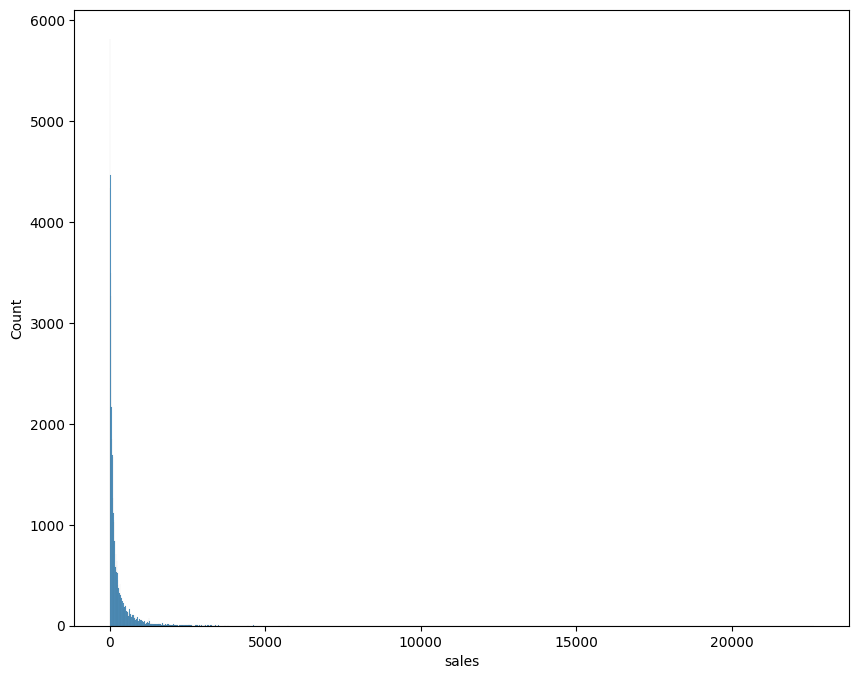

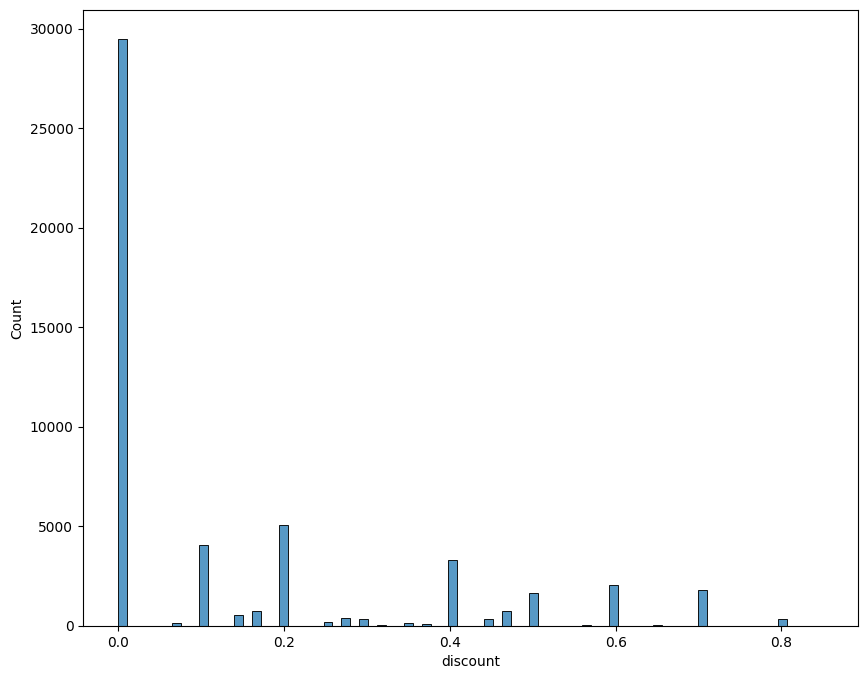

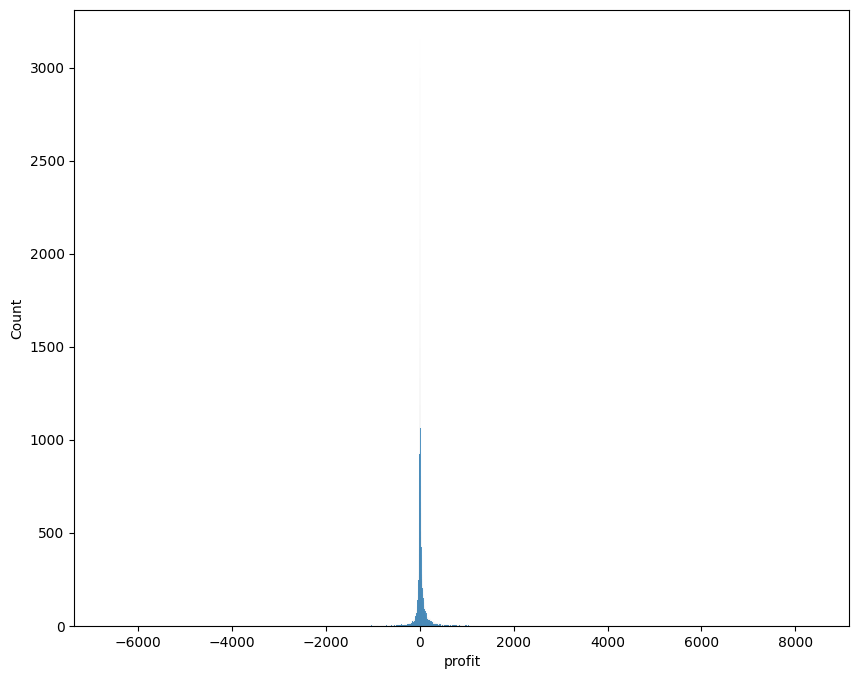

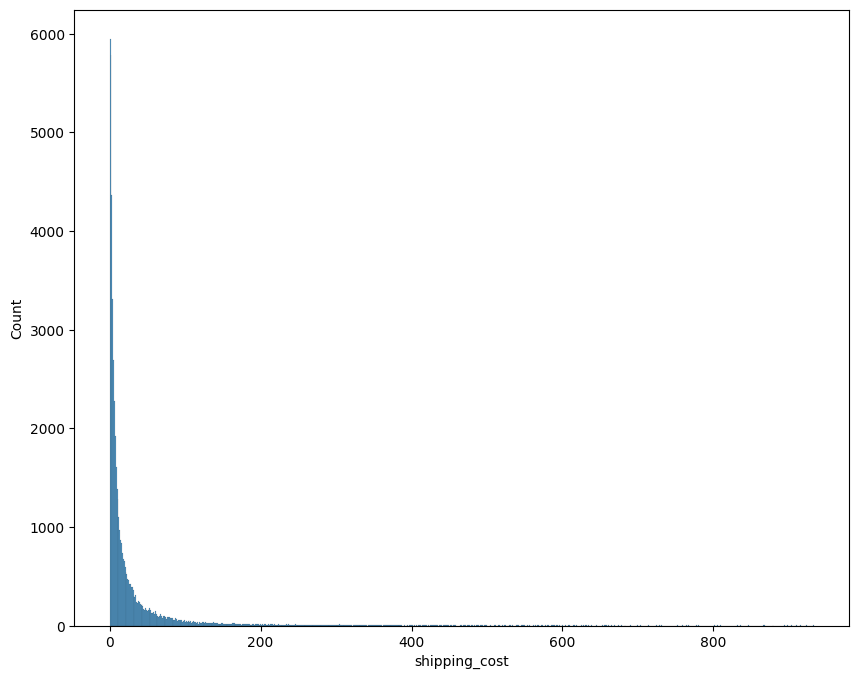

In [70]:
columnas_float = df.select_dtypes(include='float').columns.tolist()
for i in columnas_float:
    plt.figure(figsize=(10, 8))
    sns.histplot(df[i])
    plt.show()
    

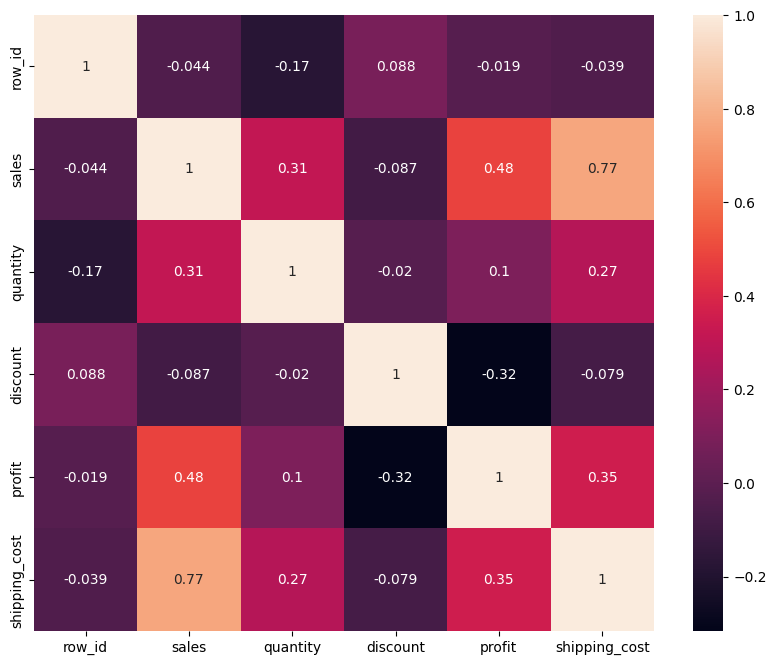

In [71]:

matrix_corr = df.corr(method="pearson",numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(matrix_corr, annot=True)
plt.show()

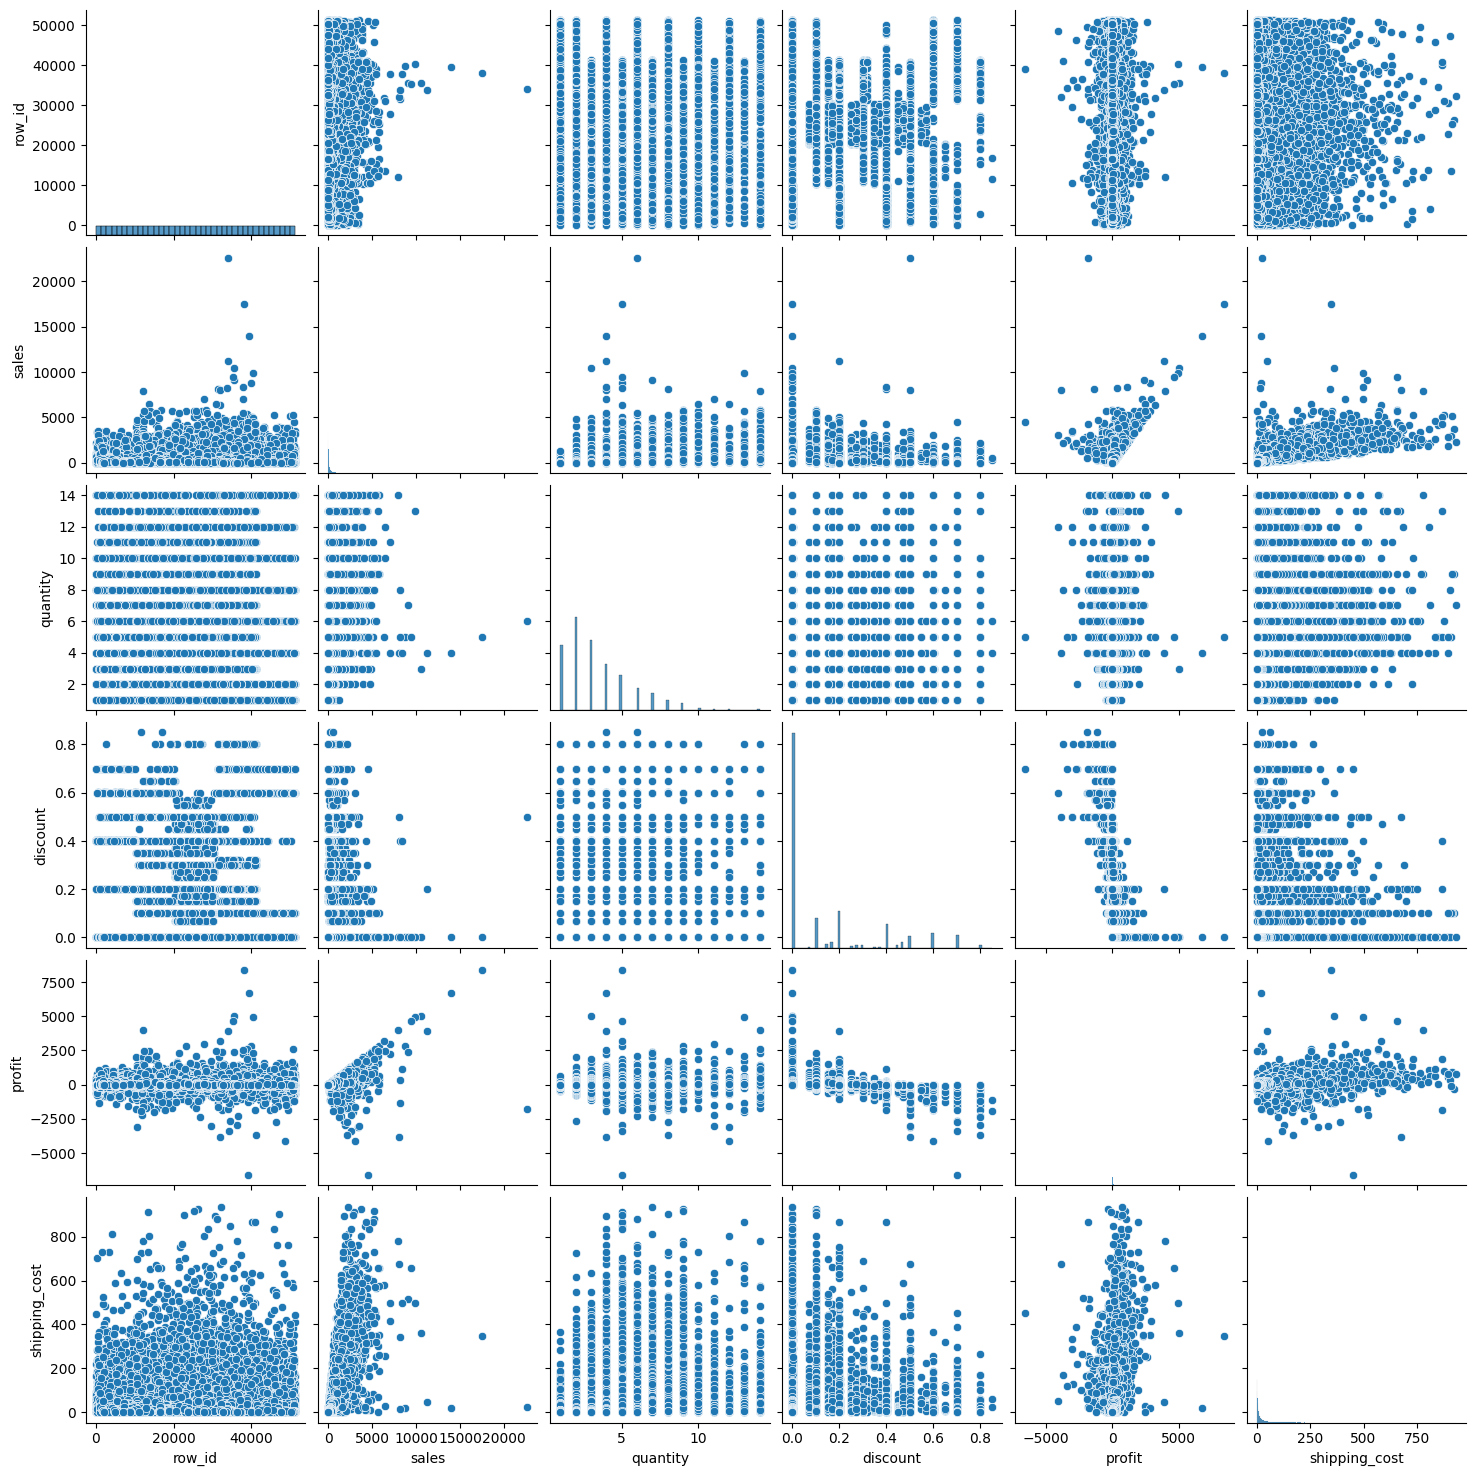

In [72]:
sns.pairplot(df)

array([[<Axes: title={'center': 'sales'}>,
        <Axes: title={'center': 'quantity'}>],
       [<Axes: title={'center': 'discount'}>,
        <Axes: title={'center': 'profit'}>],
       [<Axes: title={'center': 'shipping_cost'}>, <Axes: >]],
      dtype=object)

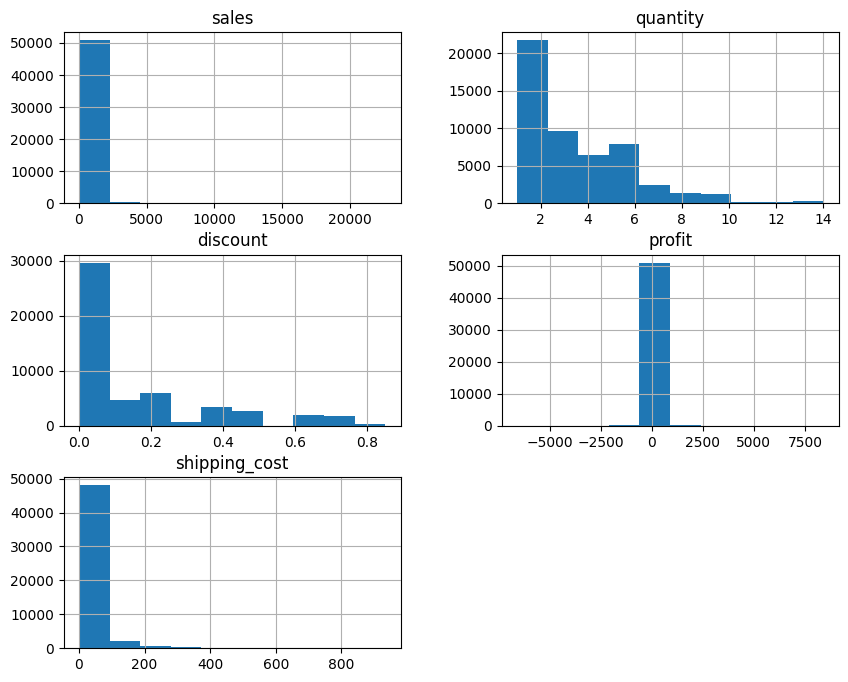

In [24]:
df[varc].hist(figsize=(10,8))

In [110]:
## CERCA INTERCUARTIL

k = 1.5
ext = df[varc].describe(percentiles=[0.25,0.75]).T[['25%','75%','mean']].reset_index()
ext['IQR'] = ext['75%'] - ext['25%'] 
ext['li']  = ext['mean'] - k*ext['IQR']
ext['ls']  = ext['mean'] + k*ext['IQR']
ext = ext[['index','li','ls']]
for v, li, ls in ext.values:
    df[f'ol_{v}'] = ((df[v]<li) | (df[v]>ls)  ).astype(int)

df['ext_iqr'] = df.filter(like='ol').max(axis=1)
df.drop(df.filter(like='ol_').columns, axis=1, inplace=True)

df['ext_iqr'].value_counts()

df = df.loc[df['ext_iqr'] == 0].reset_index(drop=True).drop(['ext_iqr'],axis=1)

array([[<Axes: title={'center': 'sales'}>,
        <Axes: title={'center': 'quantity'}>],
       [<Axes: title={'center': 'discount'}>,
        <Axes: title={'center': 'profit'}>],
       [<Axes: title={'center': 'shipping_cost'}>, <Axes: >]],
      dtype=object)

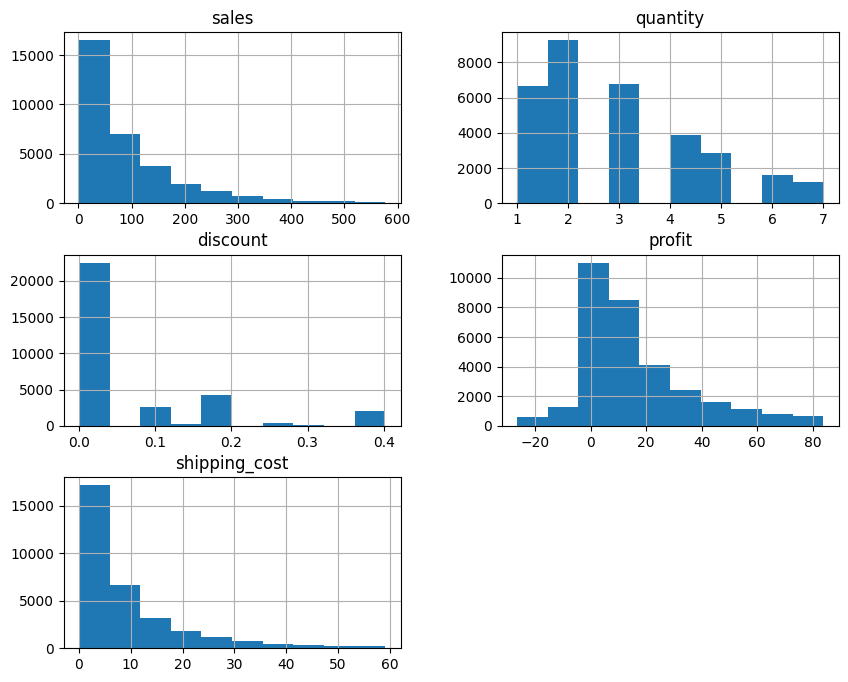

In [111]:
df[varc].hist(figsize=(10,8))

## Categóricas

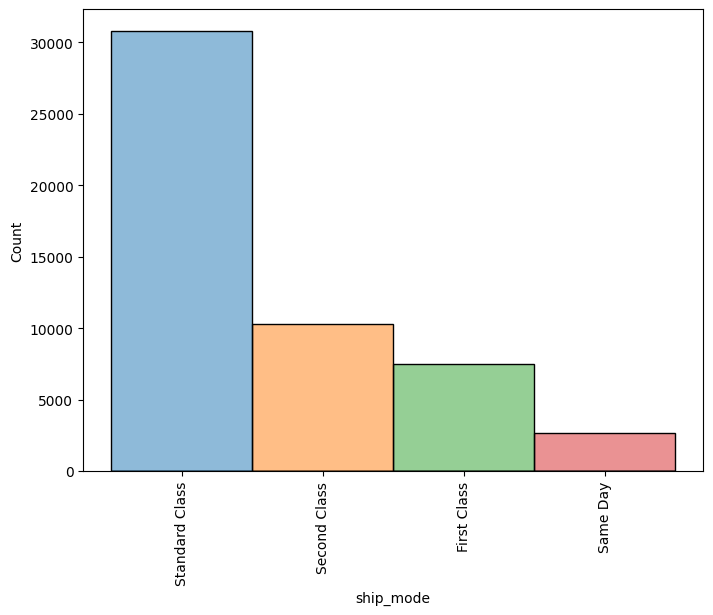

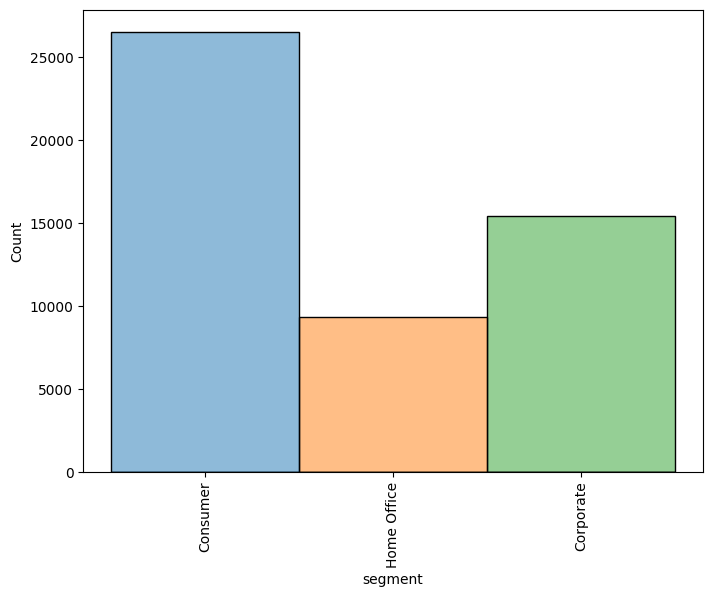

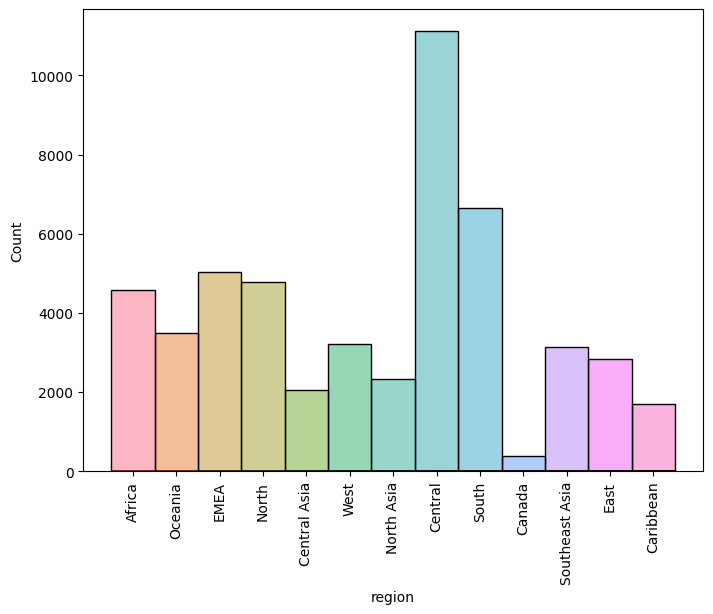

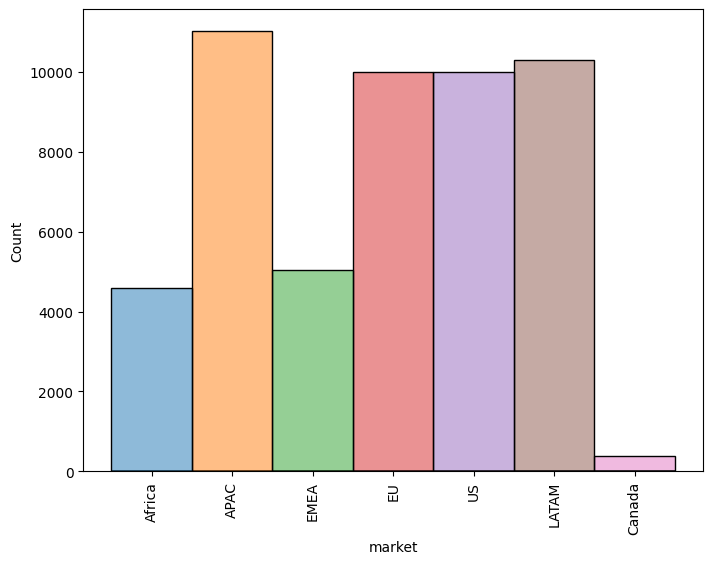

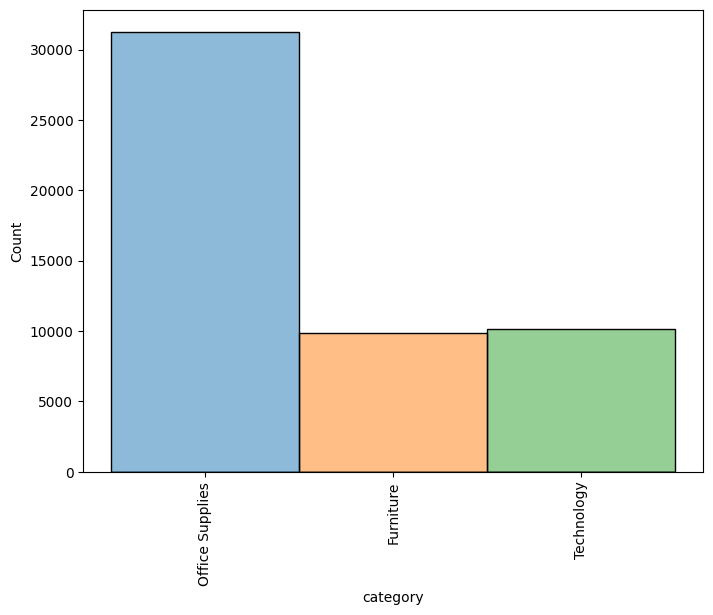

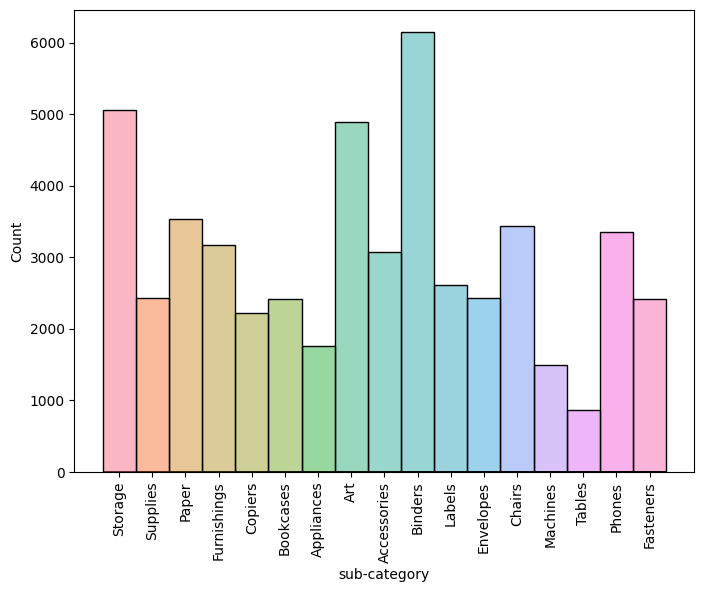

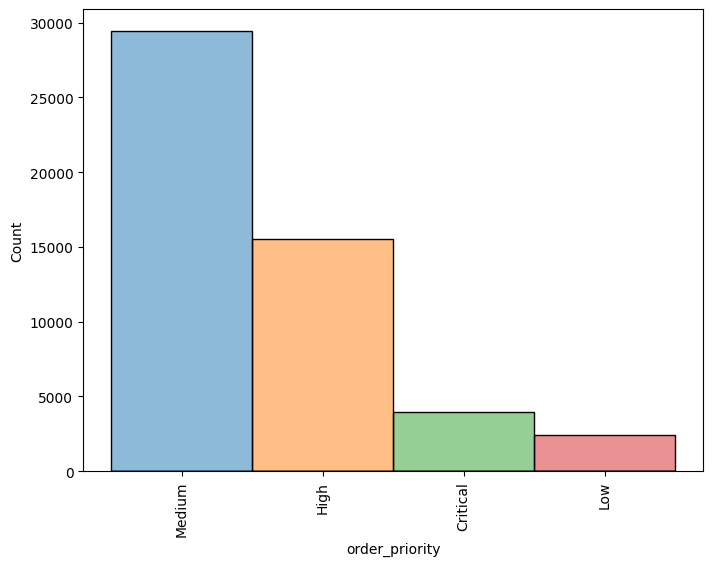

In [76]:
for i in vard:
    if df[i].value_counts().count() < 20:
        plt.figure(figsize=(8, 6))
        sns.histplot(df, x=i , hue=i, legend=False)
        plt.xticks(rotation = 90)
        # sns.histplot(df[i])
        plt.show()

In [77]:
for i in vard:
    if df[i].value_counts().count() > 20:
        print(f"Las variables con más de 20 valores son {i}")

Las variables con más de 20 valores son order_id
Las variables con más de 20 valores son customer_id
Las variables con más de 20 valores son customer_name
Las variables con más de 20 valores son country
Las variables con más de 20 valores son city
Las variables con más de 20 valores son state
Las variables con más de 20 valores son product_name


In [78]:
df.order_id.value_counts()

order_id
CA-2014-100111     14
NI-2014-8880       13
TO-2014-9950       13
IN-2012-41261      13
IN-2013-42311      13
                   ..
ID-2014-43494       1
ES-2014-2638373     1
IT-2014-1612191     1
PL-2014-9180        1
CA-2014-156720      1
Name: count, Length: 25035, dtype: int64

In [79]:
df.customer_id.value_counts()

customer_id
PO-18850    97
BE-11335    94
JG-15805    90
SW-20755    89
MY-18295    85
            ..
MG-7650      1
MG-7890      1
DK-2985      1
ZC-11910     1
BG-1035      1
Name: count, Length: 1590, dtype: int64

In [80]:
df.customer_name.value_counts()

customer_name
Muhammed Yedwab    108
Steven Ward        106
Bill Eplett        102
Gary Hwang         102
Patrick O'Brill    102
                  ... 
Andy Reiter         35
David Bremer        34
Darren Budd         31
Nicole Brennan      31
Michael Oakman      29
Name: count, Length: 795, dtype: int64

In [82]:
df.country.value_counts()

country
United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Eritrea             2
Chad                2
Swaziland           2
South Sudan         2
Bahrain             2
Name: count, Length: 147, dtype: int64

In [83]:
df.city.value_counts()

city
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Santo Domingo    443
                ... 
Melitopol'         1
Terneuzen          1
Athis-Mons         1
Yuyao              1
Deer Park          1
Name: count, Length: 3636, dtype: int64

In [84]:
df.state.value_counts()

state
California       2001
England          1499
New York         1128
Texas             985
Ile-de-France     981
                 ... 
Arad                1
Edirne              1
Kastamonu           1
Gangwon             1
Inhambane           1
Name: count, Length: 1094, dtype: int64

In [86]:
df.product_name.value_counts()

product_name
Staples                                                                      227
Cardinal Index Tab, Clear                                                     92
Eldon File Cart, Single Width                                                 90
Rogers File Cart, Single Width                                                84
Ibico Index Tab, Clear                                                        83
                                                                            ... 
Okidata B401 Printer                                                           1
Snap-A-Way Black Print Carbonless Speed Message, No Reply Area, Duplicate      1
Xerox WorkCentre 6505DN Laser Multifunction Printer                            1
Barricks Round Table, Rectangular                                              1
Multimedia Mailers                                                             1
Name: count, Length: 3788, dtype: int64

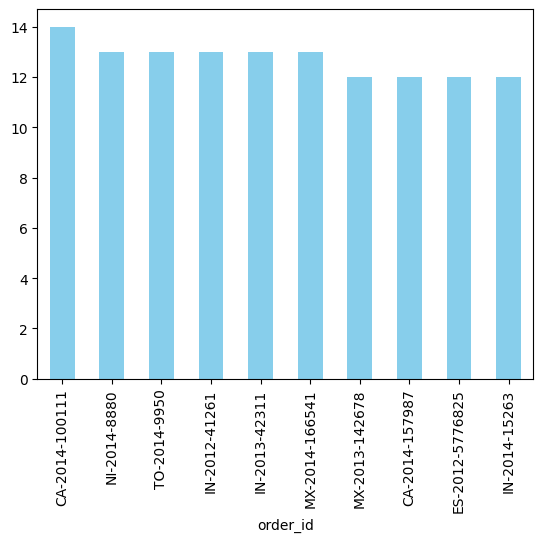

<Figure size 1000x600 with 0 Axes>

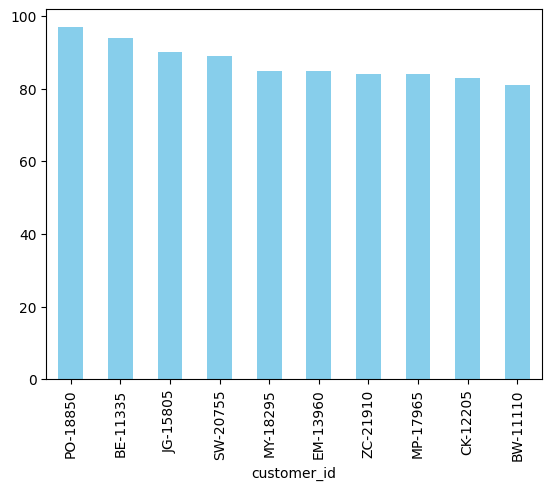

<Figure size 1000x600 with 0 Axes>

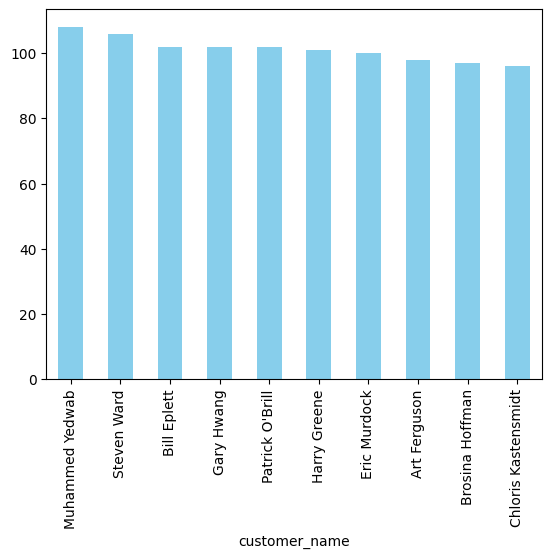

<Figure size 1000x600 with 0 Axes>

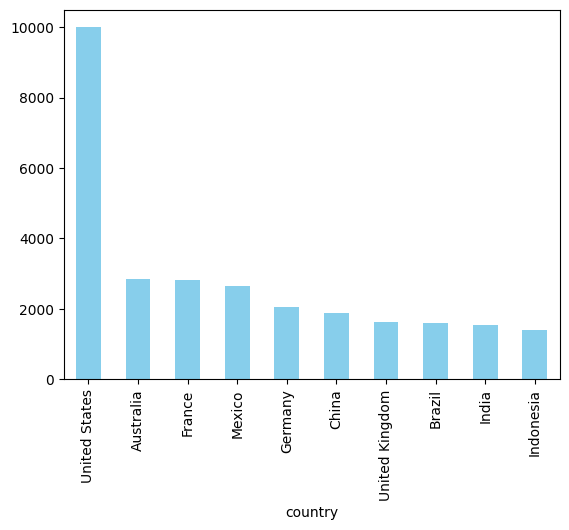

<Figure size 1000x600 with 0 Axes>

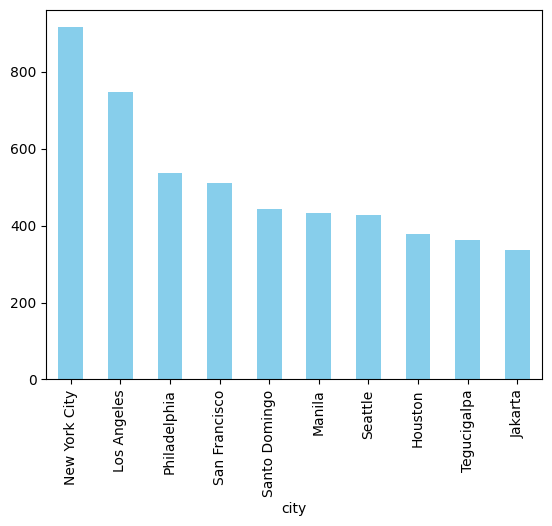

<Figure size 1000x600 with 0 Axes>

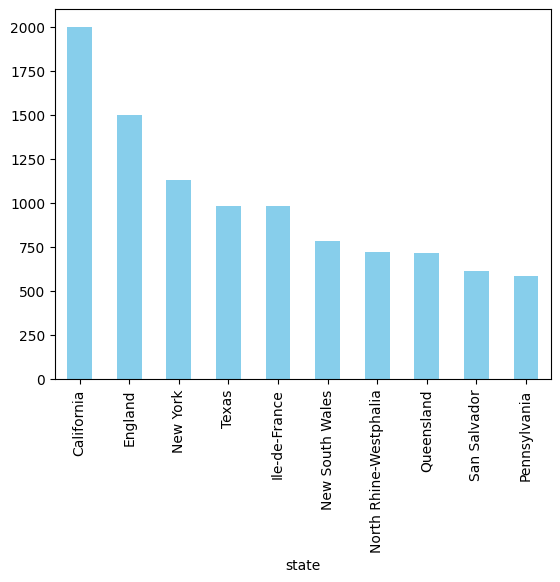

<Figure size 1000x600 with 0 Axes>

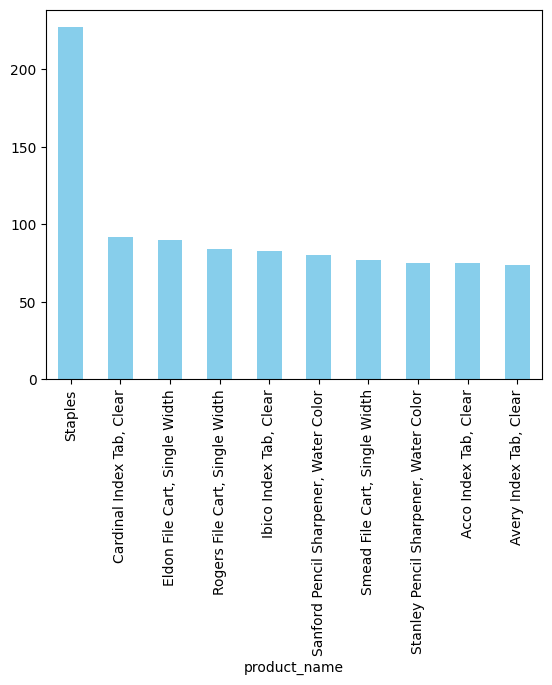

<Figure size 1000x600 with 0 Axes>

In [96]:
 for i in vard:

    if df[i].value_counts().count() > 20:

        top_10_values = df[i].value_counts().head(10)
        top_10_values.plot(kind='bar', color='skyblue')
        plt.figure(figsize=(10, 6))
        plt.show()

# Gráficas por Pares

* ¿EXISTEN ALGUNOS CLIENTES QUE SON REGULARES? SI ES ASI, ¿CUALES DE ELLOS GENERAN MAYORES GANANCIAS?
* ¿CUALES SUBCATEGORIAS DE PRODUCTOS SON LOS RESPONSABLES POR LA MAYORIA DE LAS GANANCIAS NEGATIVAS DE LAS VENTAS?
* ¿HAY ALGUNA TENDENCIA CON RESPECTO A COMO SE VENDEN LOS DIFERENTES PRODUCTOS RESPECTO AL TIEMPO?
* ¿HAY ALGUN PATRON CON RESPECTO A COMO LAS DIFERENTES SUB CATEGORIAS DE PRODUCTOS SE VENDEN EN LOS DIFERENTES MERCADOS?

In [104]:
df.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'market', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit',
       'shipping_cost', 'order_priority'],
      dtype='object')

In [106]:
df.head(1)

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub-category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.3,2,0.0,106.14,35.46,Medium


In [130]:
def separar(cadena):
    if '-' in cadena:
        dia, mes, anio = cadena.split("-")
        return "-".join([mes, dia, anio])
    elif '/' in cadena:
        dia, mes, anio = cadena.split("/")
        return "-".join([mes, dia, anio])
    else:
        return cadena

In [131]:
df['order_date'] = df['order_date'].apply(separar)

In [132]:
df['order_date'].value_counts()

order_date
9-3-2014      93
11-20-2014    81
12-10-2014    78
06-18-2014    77
11-11-2013    75
              ..
10-6-2013      1
1-6-2013       1
2-3-2013       1
3-11-2012      1
02-13-2011     1
Name: count, Length: 1417, dtype: int64

In [133]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [134]:

df['ship_date'] = df['ship_date'].apply(separar)

In [135]:
df['ship_date'] = pd.to_datetime(df['ship_date'])


In [101]:
# CLIENTE VS PROFIT
df_cliente_profit = df.groupby(['customer_name','profit']).size().reset_index(name='Count')
df_cliente_profit = 

,customer_name,profit,Count
0,Aaron Bergman,-286.9200,1
1,Aaron Bergman,-71.0250,1
2,Aaron Bergman,-68.9826,1
3,Aaron Bergman,-48.3300,1
4,Aaron Bergman,-19.8120,1
...,...,...,...
50779,Zuschuss Donatelli,86.4000,1
50780,Zuschuss Donatelli,87.8400,1
50781,Zuschuss Donatelli,92.5800,1
50782,Zuschuss Donatelli,118.8000,1


<Axes: xlabel='customer_name', ylabel='Count'>

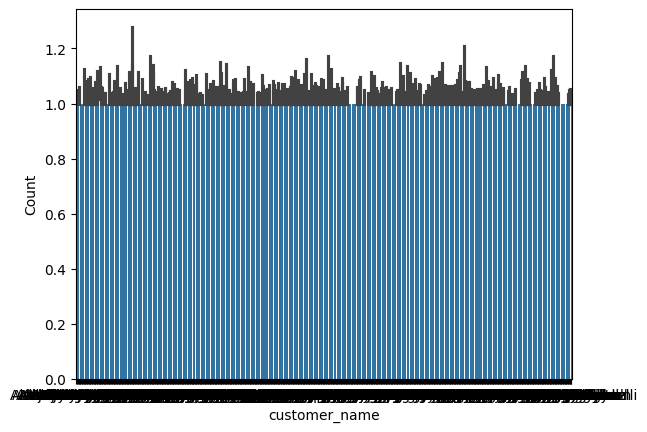

In [102]:
sns.barplot(x='customer_name', y='Count', data=df_cliente_profit)